In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import pathlib
import os
#https://medium.com/analytics-vidhya/time-series-forecasting-sarima-vs-auto-arima-models-f95e76d71d8f

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dir_path = pathlib.Path.cwd().parent
folder_path = dir_path / "data" / "building_france_prediction" 
file_name = "departement_6.xlsx"
df= pd.read_excel(os.path.join(folder_path, file_name),parse_dates=['Date'],index_col='Date')
print(df)

            Day Mont  Year  transactions_6
Date                                      
2018-07-01  Sun  Jul  2018               0
2018-07-02  Mon  Jul  2018             156
2018-07-03  Tue  Jul  2018             138
2018-07-04  Wed  Jul  2018             134
2018-07-05  Thu  Jul  2018             145
...         ...  ...   ...             ...
2023-06-26  Mon  Jun  2023             194
2023-06-27  Tue  Jun  2023             192
2023-06-28  Wed  Jun  2023             172
2023-06-29  Thu  Jun  2023             250
2023-06-30  Fri  Jun  2023             305

[1826 rows x 4 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-07-01 to 2023-06-30
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Day             1826 non-null   object
 1   Mont            1826 non-null   object
 2   Year            1826 non-null   int64 
 3   transactions_6  1826 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 71.3+ KB


In [4]:
# df = df.loc[ :'2021-01-01']
# df

In [3]:
import seaborn as sns

In [6]:
# Understanding the data for time based train-test split
print(f'Start Date: {df.index.min()}')
print(f'End Date: {df.index.max()}')
print(f'Total Days: {len(df)}')

Start Date: 2018-07-01 00:00:00
End Date: 2023-06-30 00:00:00
Total Days: 1826


In [4]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Day               0
Mont              0
Year              0
transactions_6    0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(22, 6))
sns.lineplot(x=df.index, y=df['transactions_6'])
plt.title('The Variation # of visit from 06/2017 until 09/2017')
plt.show()


In [3]:
dm=df.reset_index()
dc=dm[['Date','transactions_6']].set_index(keys='Date')
dc

,transactions_6
Date,
2018-07-01,0
2018-07-02,156
2018-07-03,138
2018-07-04,134
2018-07-05,145
...,...
2023-06-26,194
2023-06-27,192
2023-06-28,172


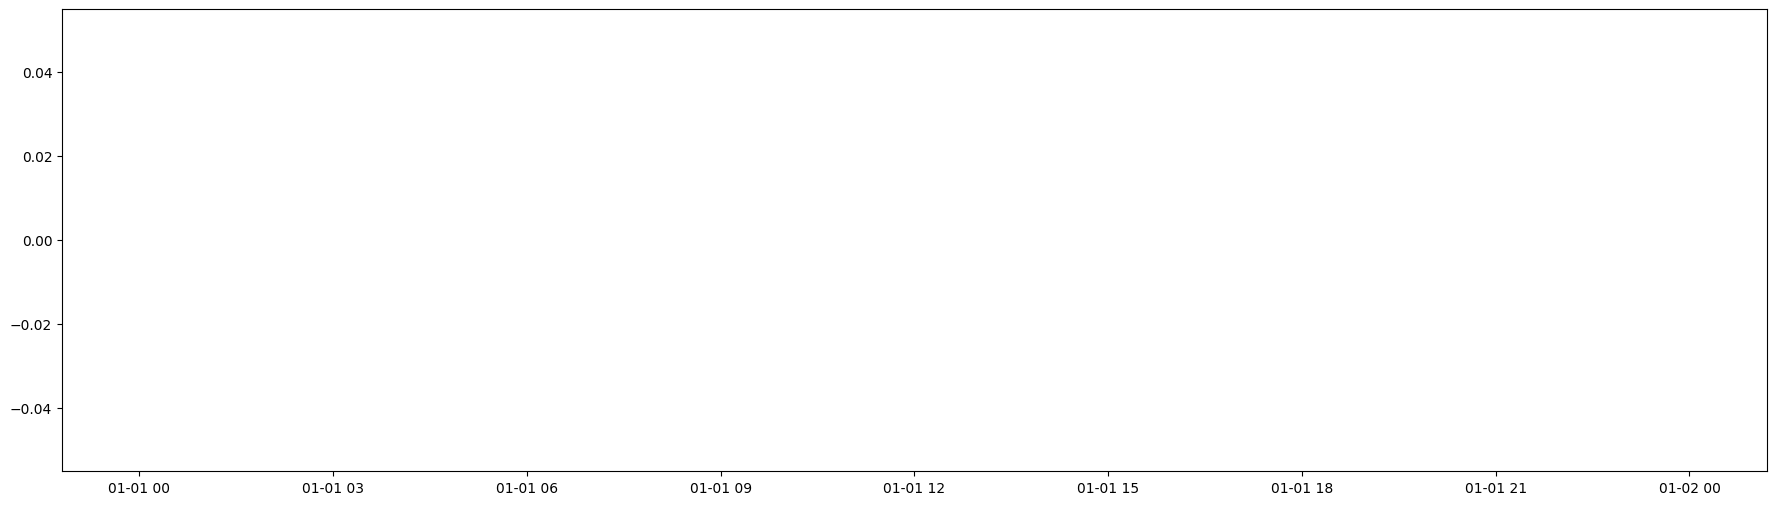

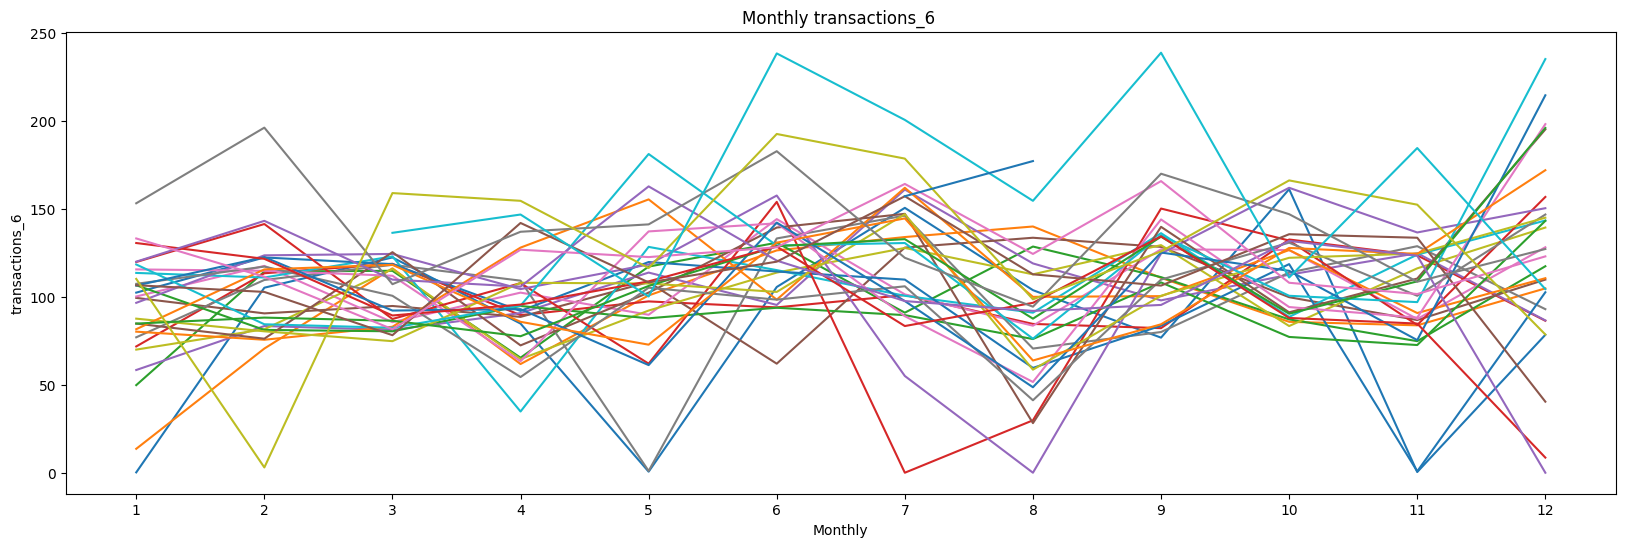

In [7]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
dc['day'] = dc.index.day
dc['month'] = dc.index.month
pivot = pd.pivot_table(dc, values='transactions_6', index='month', columns='day', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Monthly transactions_6 ')
plt.xlabel('Monthly')
plt.ylabel('transactions_6')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

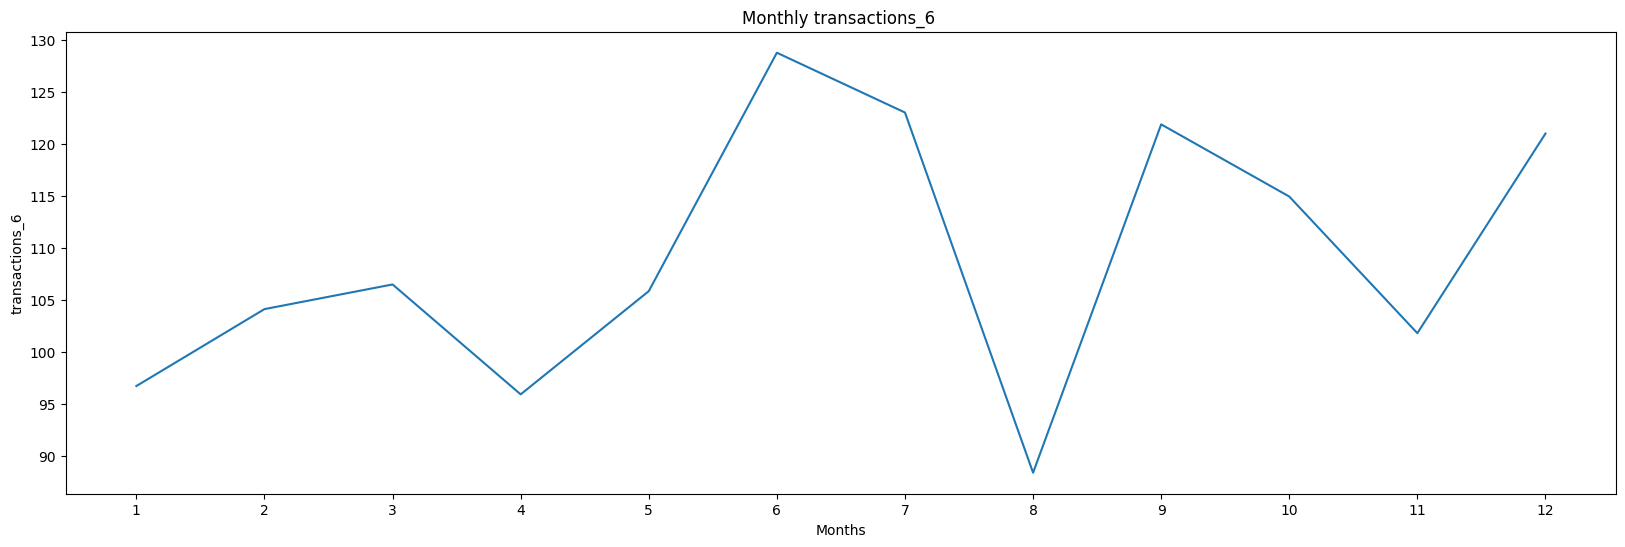

In [8]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly transactions_6 ')
plt.xlabel('Months')
plt.ylabel('transactions_6')
plt.xticks([x for x in range(1,13)])
plt.show()

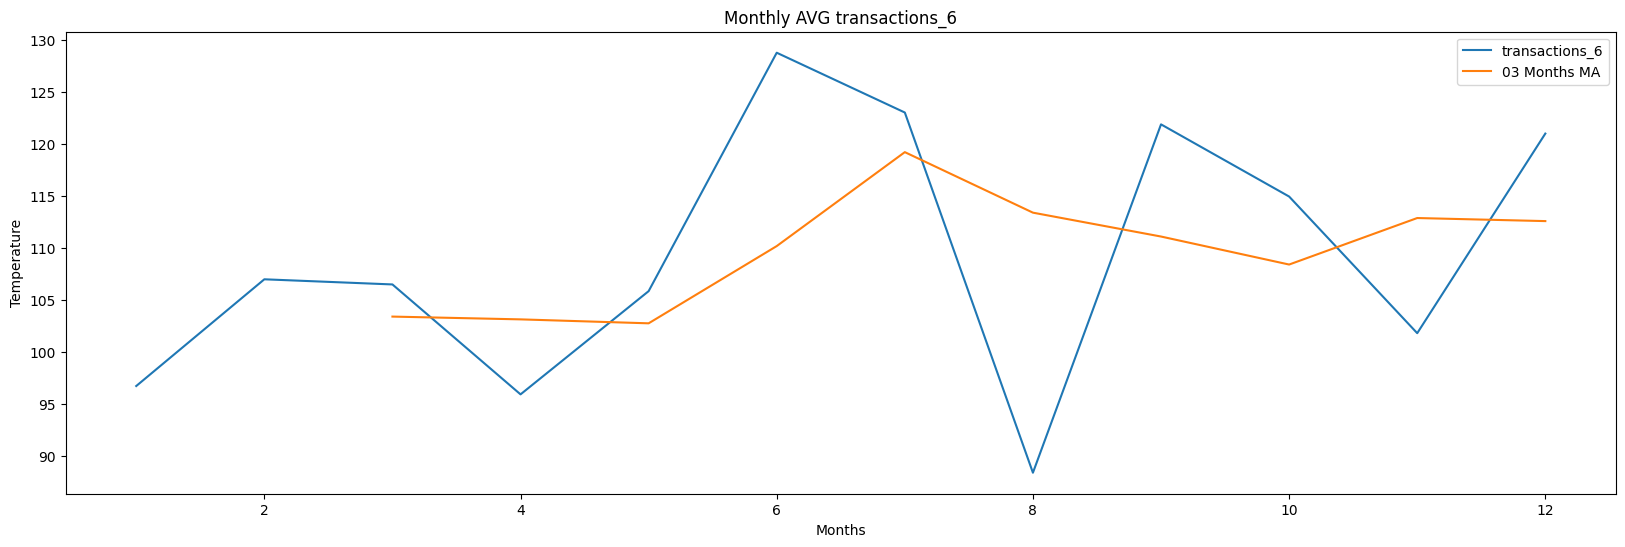

In [9]:
year_avg = pd.pivot_table(dc, values='transactions_6', index='month', aggfunc='mean')
year_avg['03 Months MA'] = year_avg['transactions_6'].rolling(3).mean()
year_avg[['transactions_6','03 Months MA']].plot(figsize=(20,6))
plt.title('Monthly AVG transactions_6')
plt.xlabel('Months')
plt.ylabel('Temperature')
#plt.xticks([x for x in range(1900,2012,3)])
plt.show()

In [4]:
dc=df.reset_index()
dc=dm[['Date','transactions_6']].set_index(keys='Date')

In [5]:
dc.tail()

,transactions_6
Date,
2023-06-26,194
2023-06-27,192
2023-06-28,172
2023-06-29,250
2023-06-30,305


Shape: Train=(1734, 1), Validation=(92, 1)


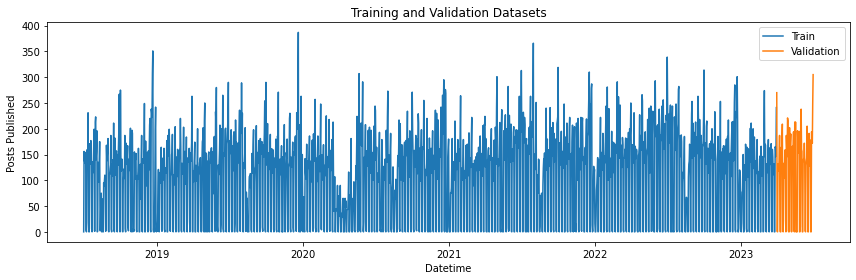

In [6]:
# Time based train-test splitting
valid = dc.loc['2023-03-31':]
train = dc.loc[:'2023-03-30']

print(f'Shape: Train={train.shape}, Validation={valid.shape}')

# Plotting the training and validation datasets
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(valid, label='Validation')
plt.xlabel('Datetime')
plt.ylabel('Posts Published')
plt.title('Training and Validation Datasets')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from pmdarima import auto_arima
from prophet import Prophet

# Machine Learning
from sklearn.metrics import mean_squared_error

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Loggers
import logging
logging.getLogger().setLevel(logging.ERROR)

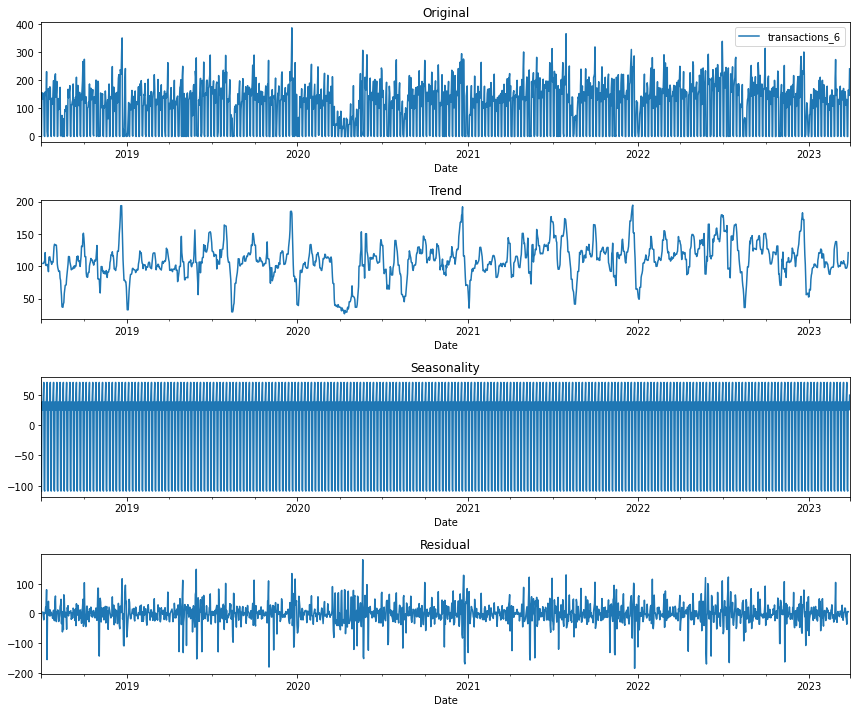

In [8]:
# Visualizing the components of our time series: Trend, Seasonality, and Noise
decomposition = sm.tsa.seasonal_decompose(train)

# Plotting the components
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
train.plot(title='Original', ax=axes[0])
decomposition.trend.plot(title='Trend', ax=axes[1])
decomposition.seasonal.plot(title='Seasonality', ax=axes[2])
decomposition.resid.plot(title='Residual', ax=axes[3])
plt.tight_layout()
plt.show()

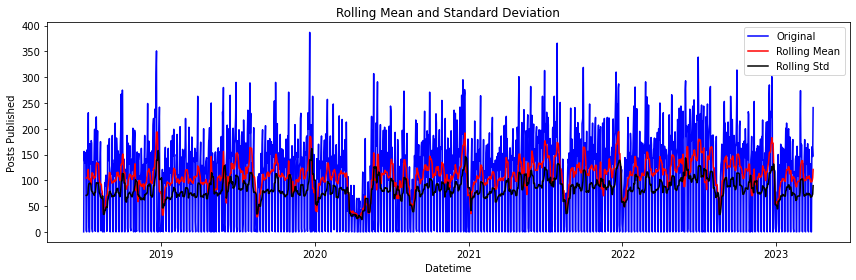

Results of Dickey-Fuller Test:
Test Statistic                -7.037292e+00
P-Value                        5.970599e-10
#Lags Used                     2.300000e+01
Number of Observations Used    1.710000e+03
Critical Value (1%)           -3.434180e+00
Critical Value (5%)           -2.863232e+00
Critical Value (10%)          -2.567671e+00
dtype: float64


In [9]:
# Creating a function to check stationarity of the given data
def check_stationarity(data):
    # Determining rolling statistics
    rol_mean = data.rolling(7).mean() #7 days in a week
    rol_std = data.rolling(7).std()
    
    # Plotting rolling statistics
    plt.figure(figsize=(12, 4))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rol_mean, color='red', label='Rolling Mean')
    plt.plot(rol_std, color='black', label='Rolling Std')
    plt.xlabel('Datetime')
    plt.ylabel('Posts Published')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Performing Dickey-Fuller test
    results = adfuller(data)
    df_output = pd.Series(results[:4], index=['Test Statistic', 'P-Value', '#Lags Used', 'Number of Observations Used'])
    for key, value in results[4].items():
        df_output[f'Critical Value ({key})'] = value
    print(f'Results of Dickey-Fuller Test:\n{df_output}')
    
# Stationarity check of our daily time series
check_stationarity(train)

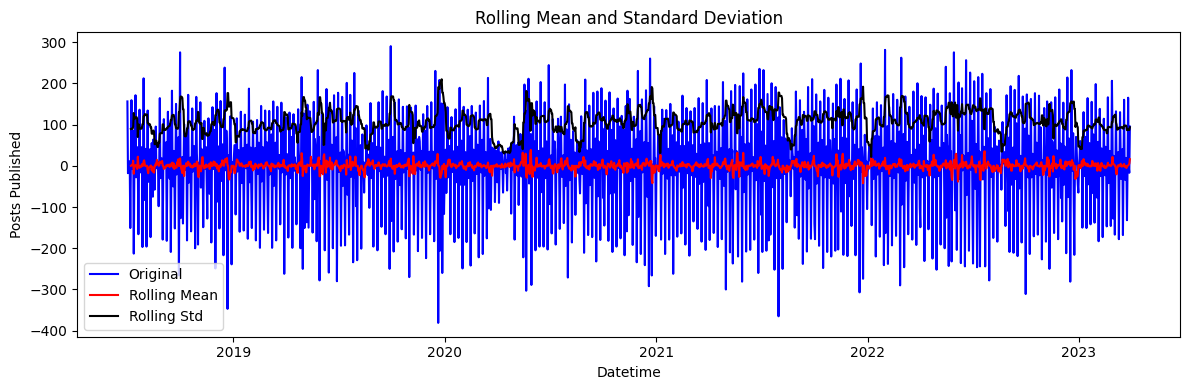

Results of Dickey-Fuller Test:
Test Statistic                -1.554678e+01
P-Value                        2.124952e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.712000e+03
Critical Value (1%)           -3.434175e+00
Critical Value (5%)           -2.863230e+00
Critical Value (10%)          -2.567670e+00
dtype: float64


In [15]:
# First Differencing of boxcox-transformed time series
train_tfm_diff = train - train.shift(1)
train_tfm_diff.dropna(inplace=True)
check_stationarity(train_tfm_diff)

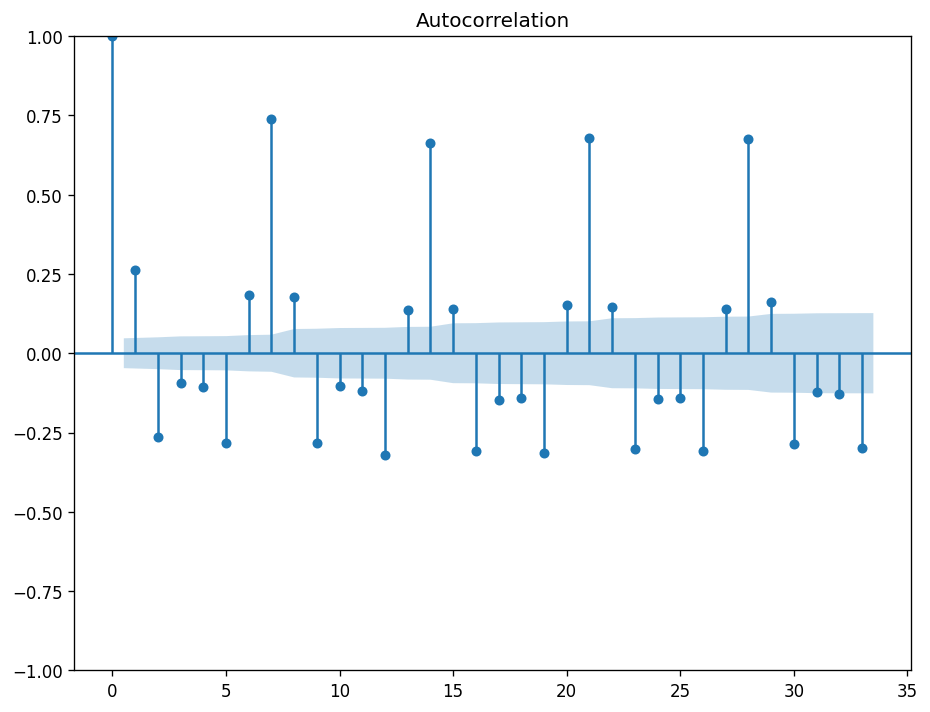

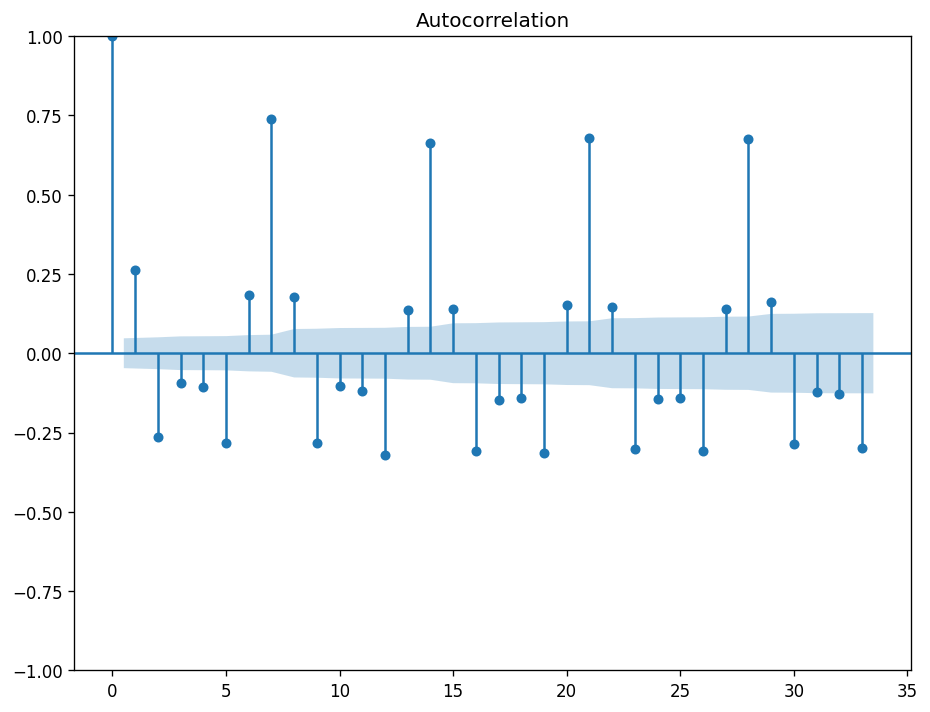

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})



plot_acf(train.transactions_6)

# 1st Differencing

plot_acf(train.transactions_6)


plt.show()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

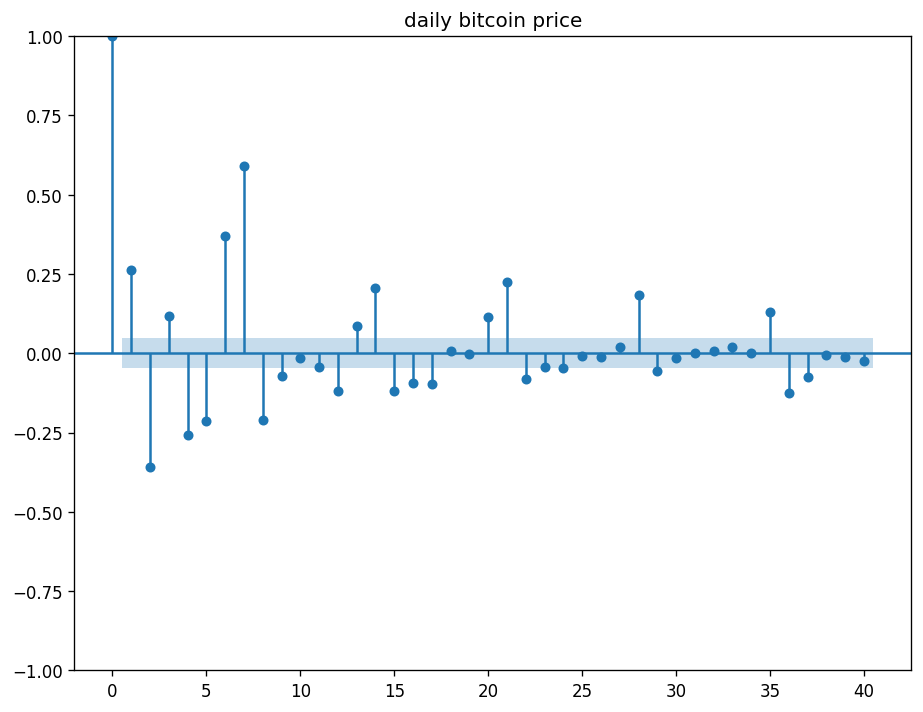

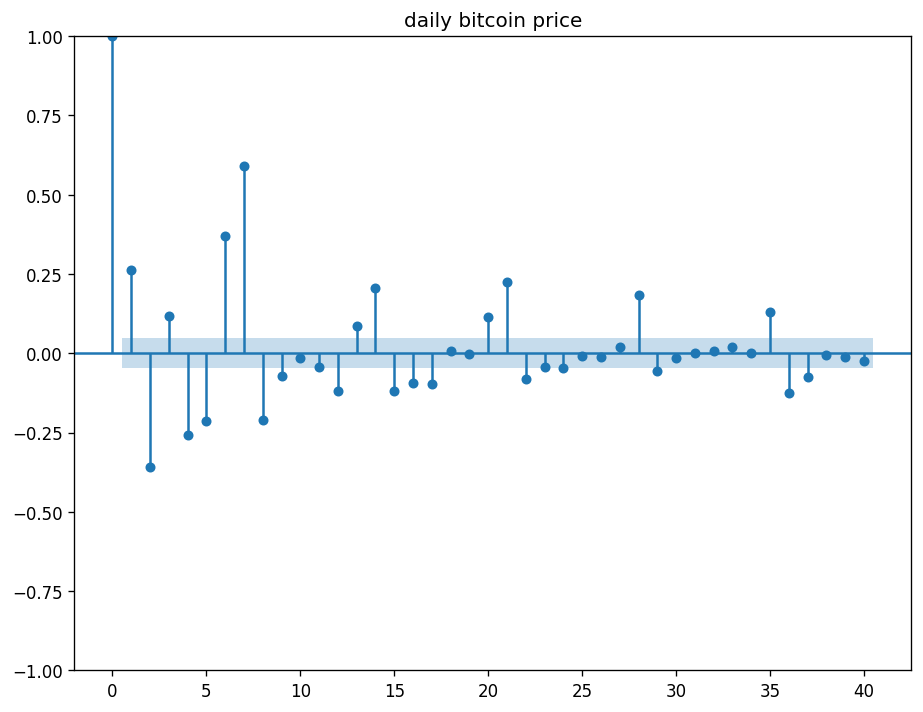

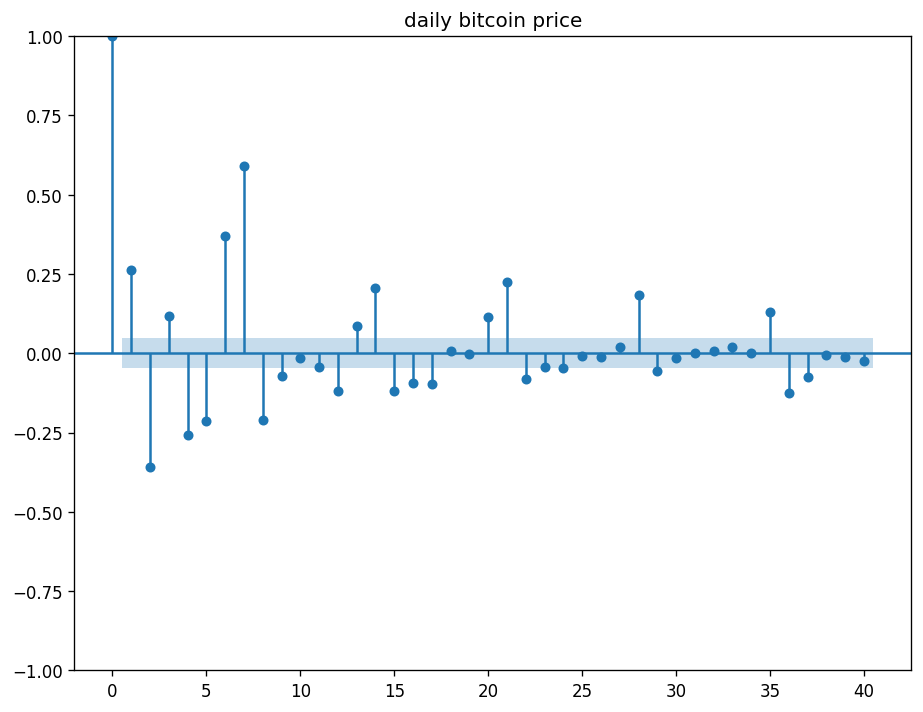

In [12]:
plot_pacf(train,lags=40,title='daily bitcoin price')
plot_pacf(train.transactions_6,lags=40,title='daily bitcoin price')

In [19]:
# Auto-ARIMA on boxcox-transformed training time series without seasonality
auto_arima = auto_arima(train, d=0, seasonal=False)
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1734
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -9842.121
Date:                Thu, 21 Dec 2023   AIC                          19696.243
Time:                        20:25:40   BIC                          19728.992
Sample:                    07-01-2018   HQIC                         19708.355
                         - 03-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    248.6639      5.972     41.639      0.000     236.959     260.368
ar.L1         -0.4473      0.022    -19.989      0.000      -0.491      -0.403
ar.L2         -0.8304      0.018    -46.981      0.0

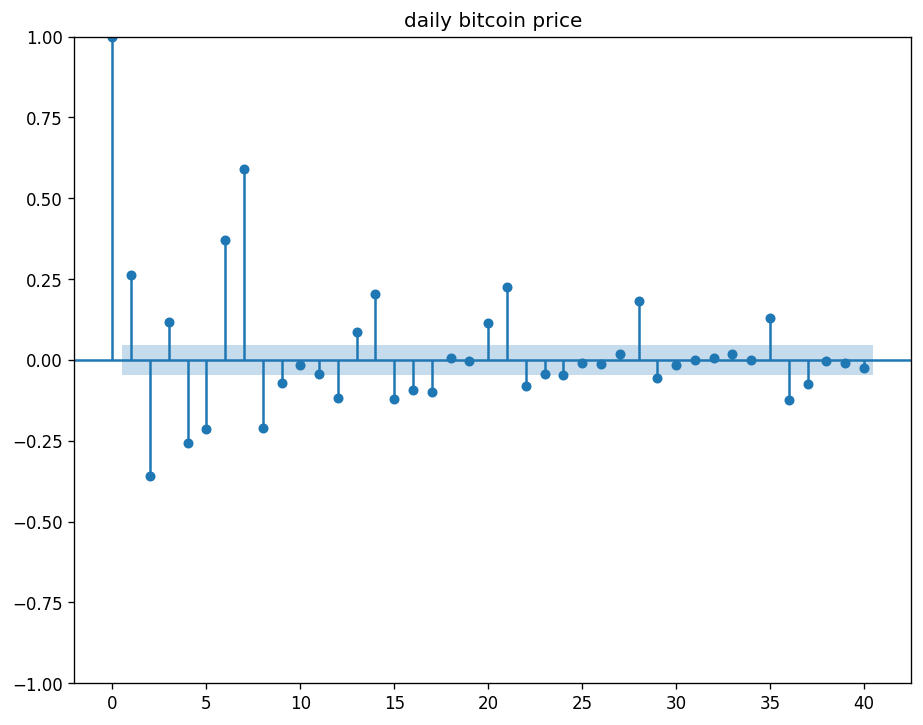

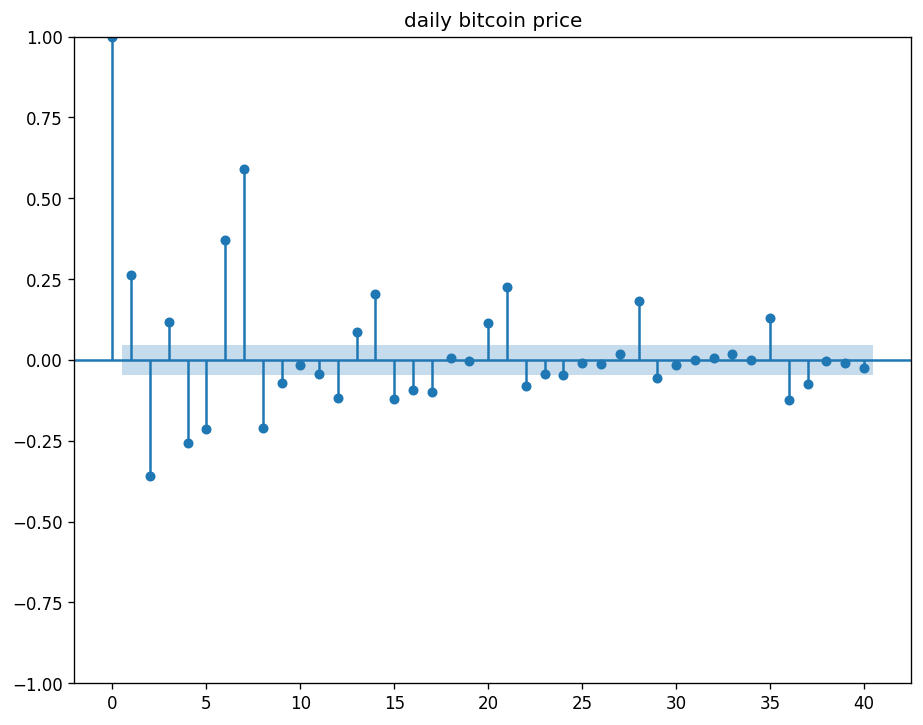

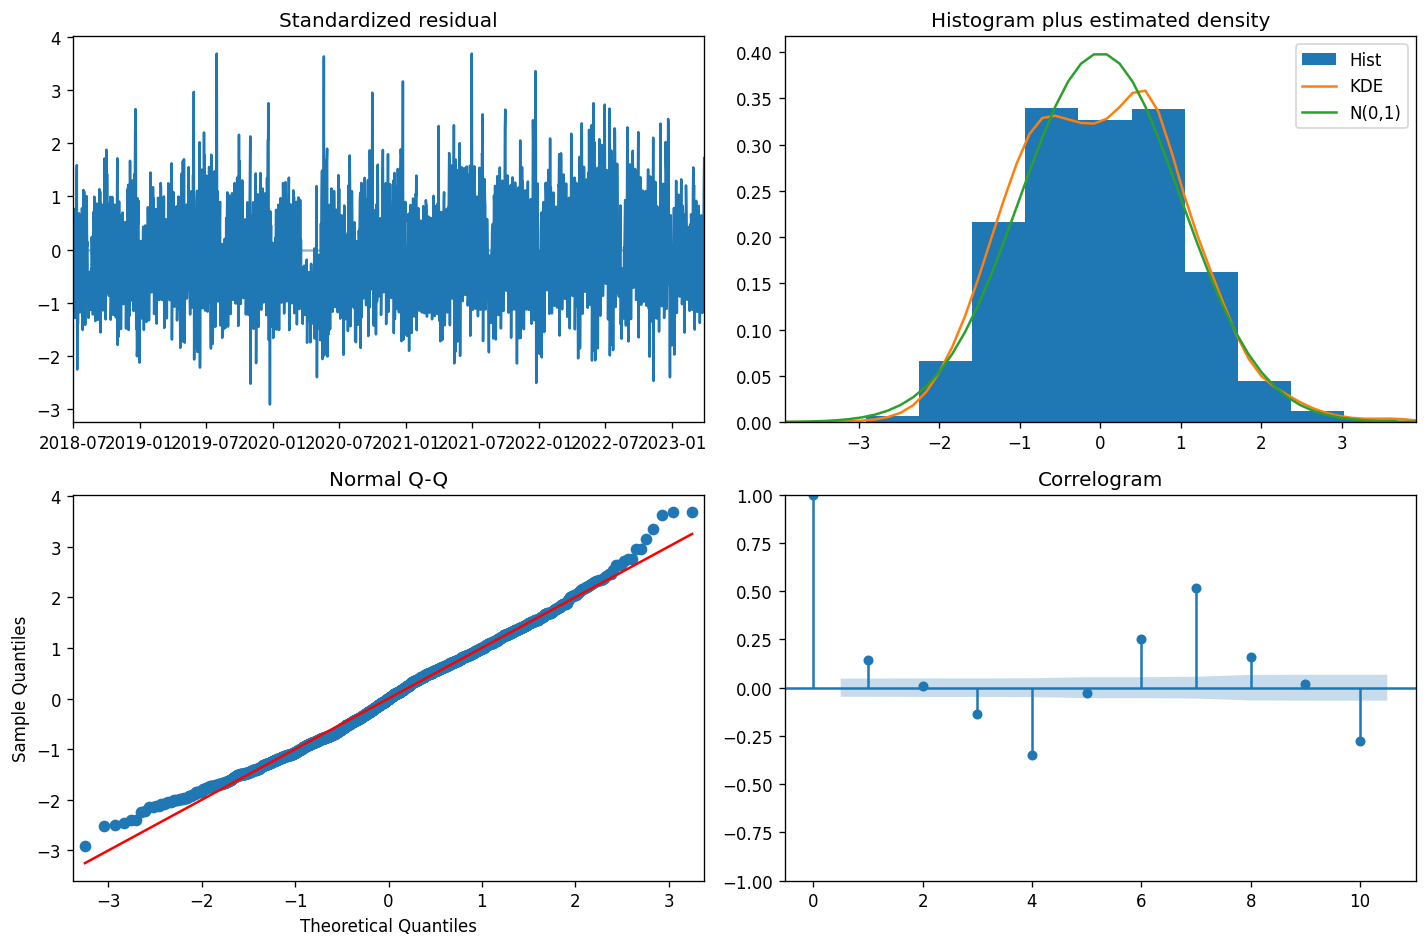

In [20]:
# Residual Plots
auto_arima.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()

In [21]:
# Creating a function to plot the results of the forecast
def plot_forecast(forecast, model, rmse):
    plt.figure(figsize=(12,4))
    plt.plot(train, label='Training')
    plt.plot(valid, label='Actual')
    plt.plot(forecast, label='Forecast')
    plt.xlabel('Datetime')
    plt.ylabel('Posts Published')
    plt.title(f'{model} (RMSE: {round(rmse, 2)})')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [22]:
resDiff = sm.tsa.arma_order_select_ic(train['transactions_6'], max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (7, 7) is the best.


In [23]:
model = sm.tsa.statespace.SARIMAX(train, order=(7,0,7),dynamic=False, seasonal_order=(0,0,0,0), trend='c')
arima = model.fit(disp=0) 
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:         transactions_6   No. Observations:                 1734
Model:               SARIMAX(7, 0, 7)   Log Likelihood               -9119.352
Date:                Thu, 21 Dec 2023   AIC                          18270.704
Time:                        20:44:39   BIC                          18358.035
Sample:                    07-01-2018   HQIC                         18303.002
                         - 03-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     48.1883     14.196      3.394      0.001      20.364      76.012
ar.L1         -0.0634      0.018     -3.459      0.001      -0.099      -0.027
ar.L2         -0.0646      0.018     -3.569      0.0

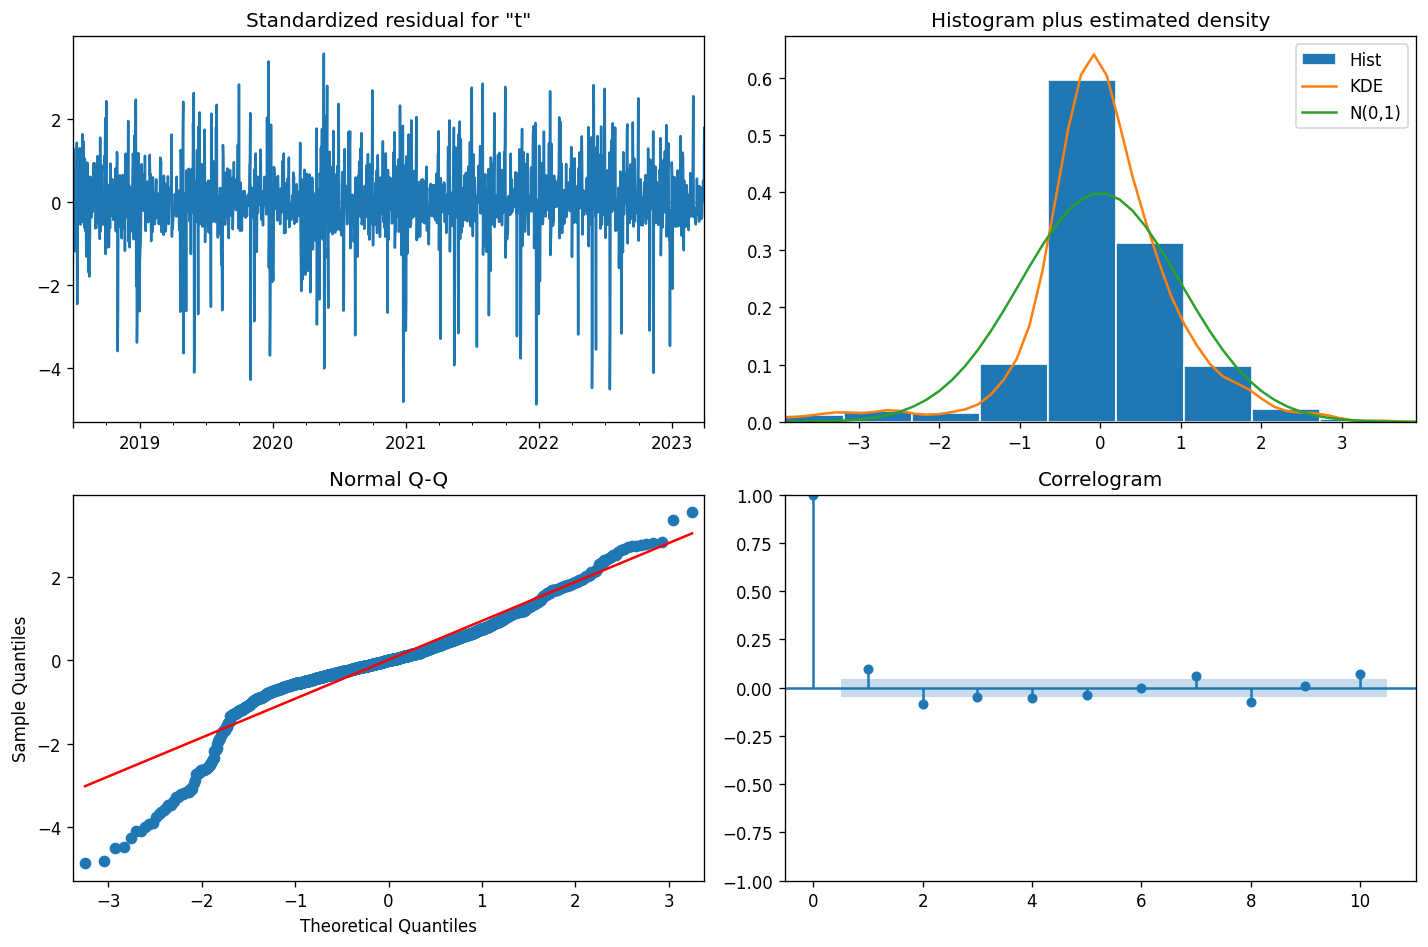

In [24]:
# Residual Plots
arima.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()

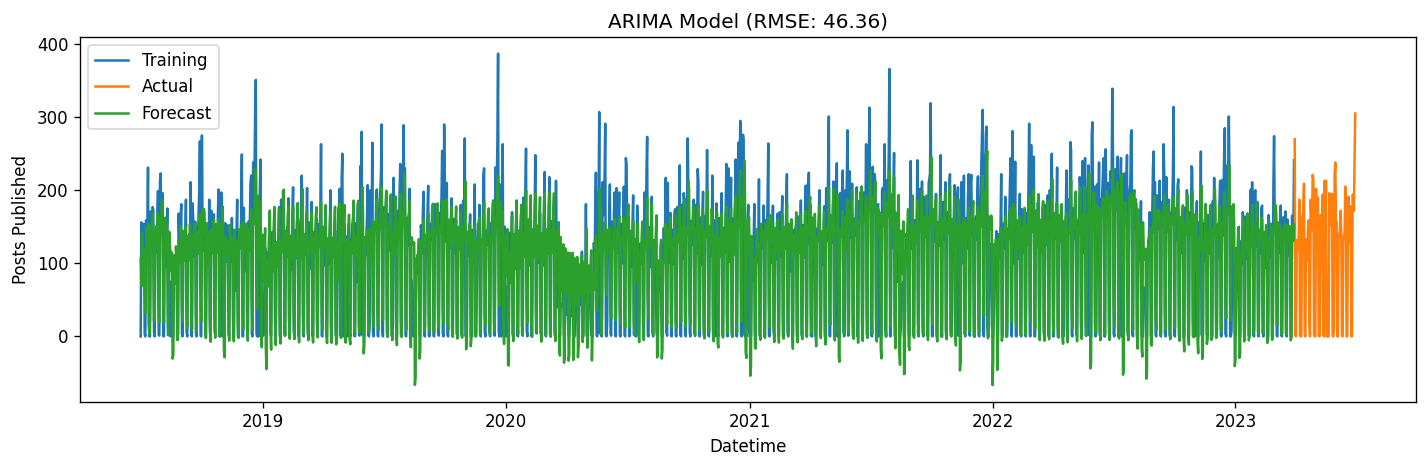

In [25]:
forecast = arima.predict(0,(train.shape[0])-1).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=train.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(train, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

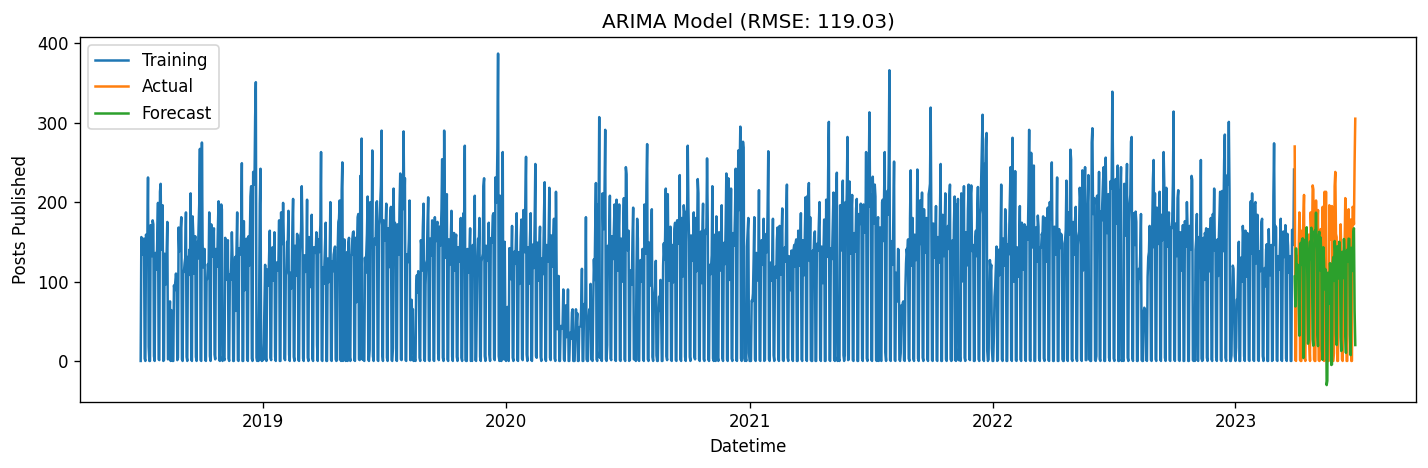

In [26]:
forecast = arima.predict(0,(valid.shape[0])-1, dynamic= False).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(valid, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

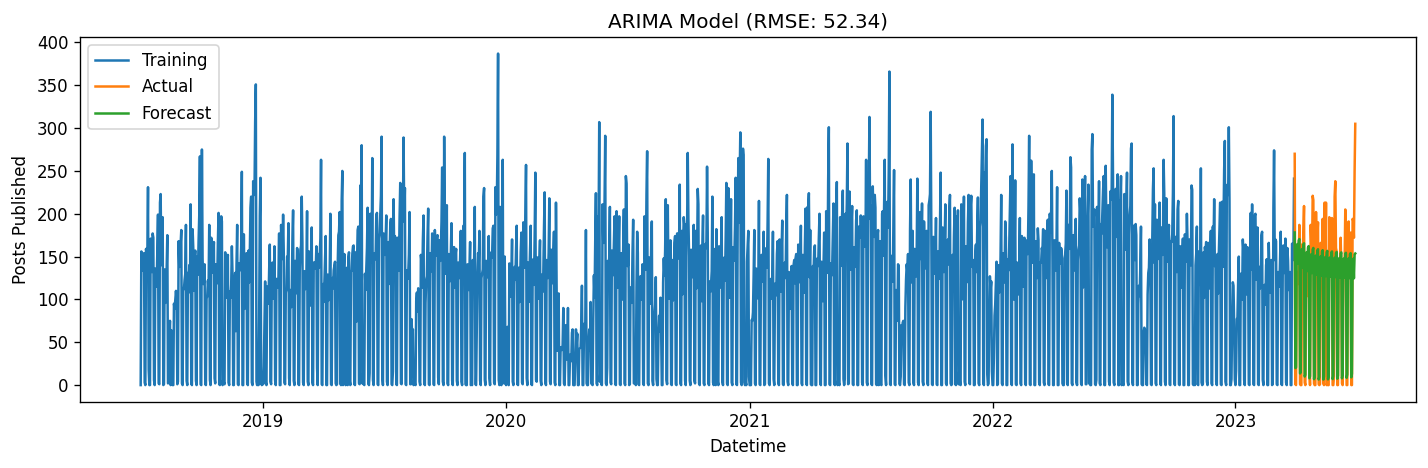

In [36]:
forecast = arima.forecast(92).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(valid, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

In [30]:
valid

,transactions_6
Date,
2023-03-31,270
2023-04-01,1
2023-04-02,0
2023-04-03,117
2023-04-04,132
...,...
2023-06-26,194
2023-06-27,192
2023-06-28,172


In [31]:
forecast['valid']=valid['transactions_6']
forecast['forecast']=forecast['forecast'].astype(int)
forecast['ecart']=forecast['forecast']-valid['transactions_6']

In [34]:
forecast['forecast']=forecast['forecast'].astype(int)

In [40]:
forecast['ecart']=forecast['forecast']-valid['transactions_6']

In [41]:
forecast

,forecast,ecart
date,,
2023-03-31,178.159369,-91.840631
2023-04-01,19.783654,18.783654
2023-04-02,20.745402,20.745402
2023-04-03,160.402985,43.402985
2023-04-04,164.602790,32.602790
...,...,...
2023-06-26,142.510829,-51.489171
2023-06-27,147.494505,-44.505495
2023-06-28,124.634927,-47.365073


In [42]:
train.shape

(1734, 1)

In [112]:
# Generate predictions and with , dynamic=True
one_step_forecast = arima.get_prediction(start=-396) 

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

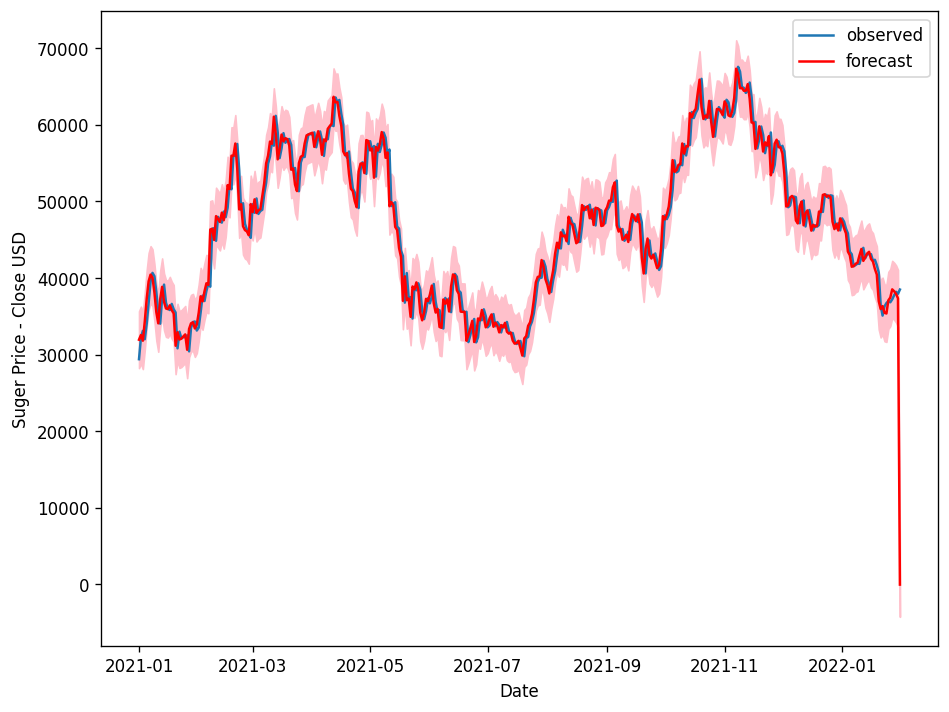

In [113]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

plt.plot(train.index, train, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Suger Price - Close USD')
plt.legend()
plt.show()

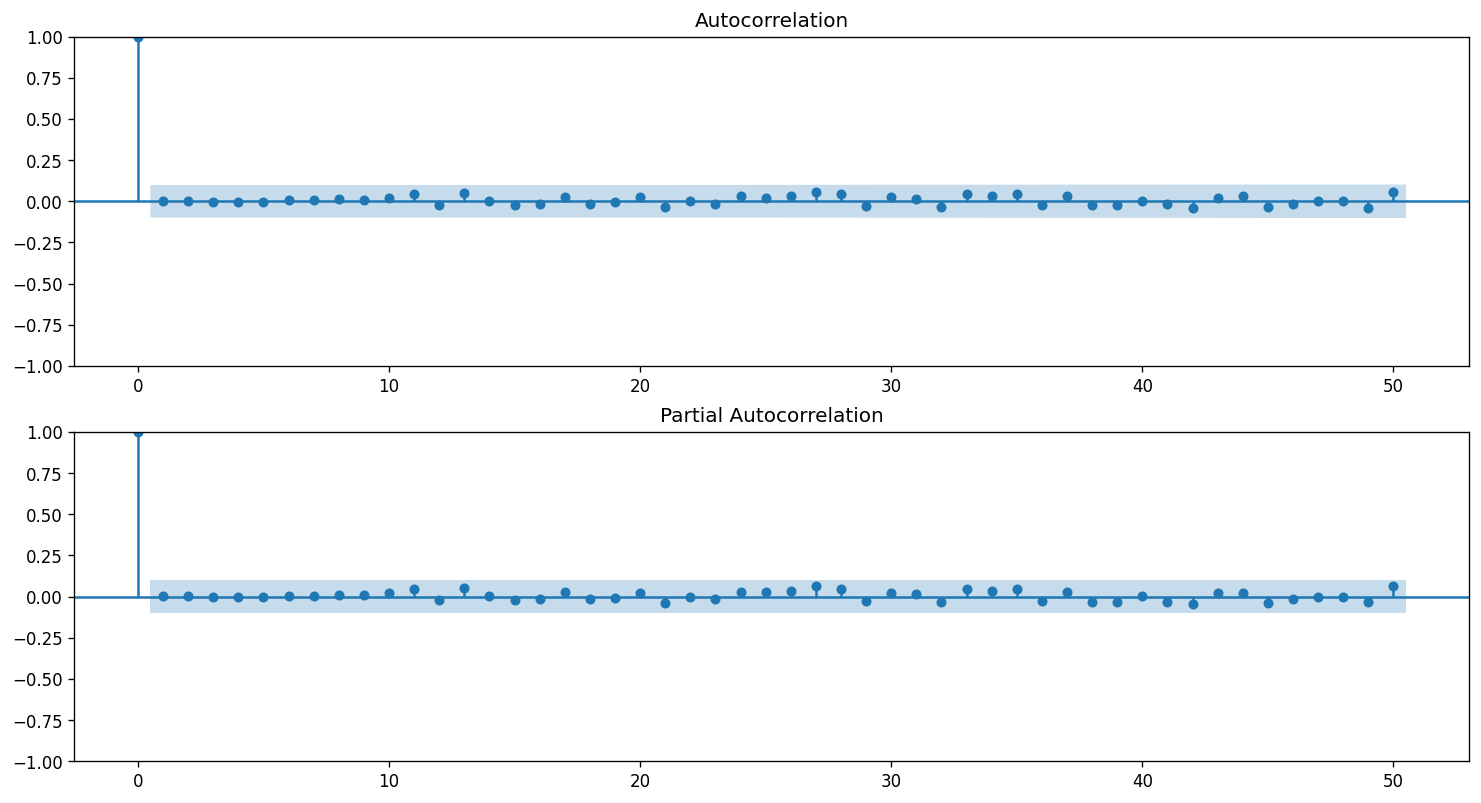

In [114]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [115]:
n_train=len(train)
n_train

396

In [119]:
def walk_forward_validation(n_train, valid):
    # create dataframe to store the outcome
    result = pd.DataFrame(columns=['forecast', 'lower_interval', 'upper_interval'])
    # predict one point at a time
    for i in range(len(valid)):
        # define train set
        train_ = dc.iloc[:n_train+i, :].copy()
        
        # train the model
        arima = sm.tsa.statespace.SARIMAX(endog = train_, order=(4,1,3)).fit(method_kwargs={"warn_convergence": False})
        # get the forecast
        results = arima.get_prediction(60)
        
        # central
        result['forecast'] = results.predicted_mean
       
        # lower interval
        confidence_intervals = results.conf_int()
       # Select lower and upper confidence limits
        result['lower_interval'] = confidence_intervals.loc[:,'lower close']
        result['upper_interval'] = confidence_intervals.loc[:,'upper close']
        result = result.iloc[:29]
        
        print('result',result.shape)
    # join with test dataframe
    result.index=valid.index
    result = result.apply(pd.to_numeric)
    return valid.join(result)

result = walk_forward_validation(n_train, valid)

result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)
result (29, 3)


In [120]:
def walk_forward_validation1(train):
    # create dataframe to store the outcome
        result = pd.DataFrame(columns=['forecast', 'lower_interval', 'upper_interval'])
    # predict one point at a time
        # define train set
        #train_ = dc.iloc[:n_train+i, :].copy()
        
        # train the model
        arima = sm.tsa.statespace.SARIMAX(train, order=(4,1,3)).fit(method_kwargs={"warn_convergence": False})
        # get the forecast
        results = arima.get_prediction()
        
        # central
        result['forecast'] = results.predicted_mean
       
        # lower interval
        confidence_intervals = results.conf_int()
       # Select lower and upper confidence limits
        result['lower_interval'] = confidence_intervals.loc[:,'lower close']
        result['upper_interval'] = confidence_intervals.loc[:,'upper close']
        #result = result.iloc[:60]
        
        print('result',result.shape)
    # join with test dataframe
        #result.index=train.index
        result = result.apply(pd.to_numeric)
        return train.join(result)

result1 = walk_forward_validation1(train)

result (396, 3)


<AxesSubplot:xlabel='date'>

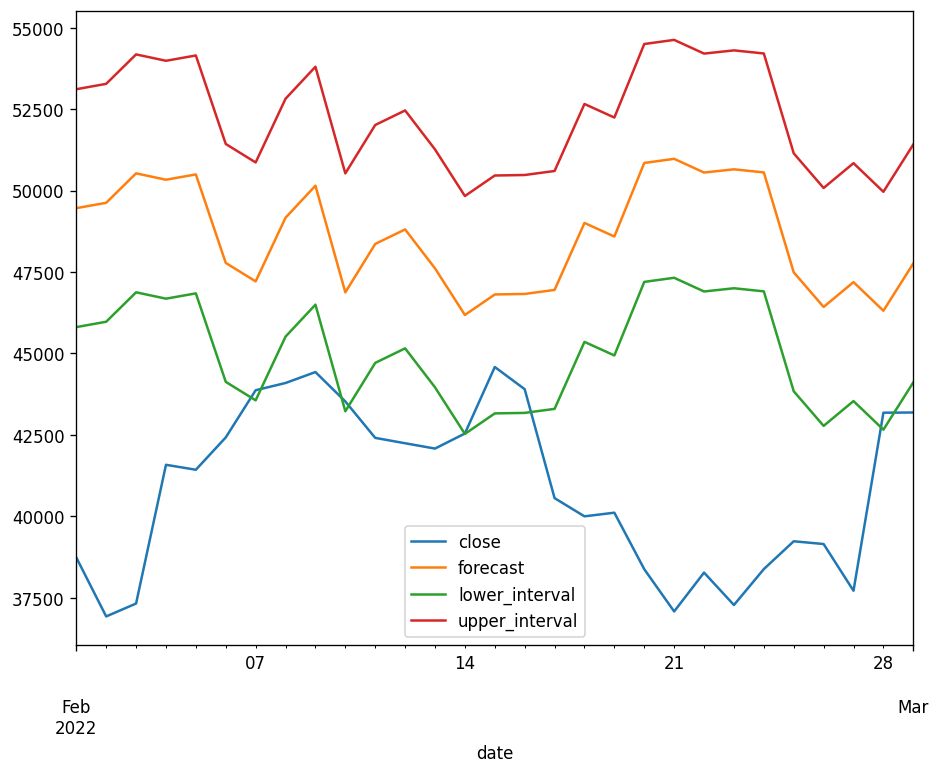

In [118]:
result.plot()

In [121]:
final = pd.concat([result1,result])

<AxesSubplot:xlabel='date'>

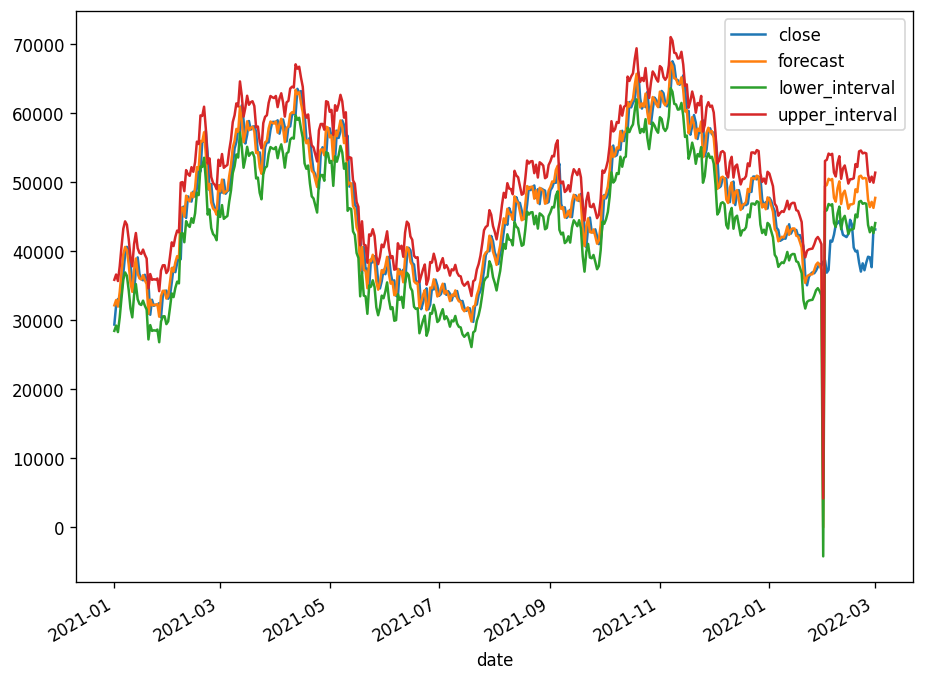

In [122]:
final.plot()

In [13]:
# Auto-ARIMA on boxcox-transformed training time series without seasonality
auto_arima = auto_arima(train, d=0, seasonal=True)
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1734
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -9842.121
Date:                Mon, 25 Dec 2023   AIC                          19696.243
Time:                        11:26:07   BIC                          19728.992
Sample:                    07-01-2018   HQIC                         19708.355
                         - 03-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    248.6639      5.972     41.639      0.000     236.959     260.368
ar.L1         -0.4473      0.022    -19.989      0.000      -0.491      -0.403
ar.L2         -0.8304      0.018    -46.981      0.0

In [14]:
import itertools
import pandas as pd

In [15]:
p = d = q = range(0,3)

pdq= list(itertools.product(p , d , q))

pdqs = [(x[0],x[1],x[2],12) for x in list(itertools.product(p , d , q)) ]
ans=[]
for comb in pdq :
    for combs in pdqs :
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order= comb,
                                            seasonal_order= combs,
                                            enforce_invertibility=False,
                                            enforce_stationarity=False)
            output = mod.fit()
            ans.append([comb,combs,output.aic])
            print("ARIMA {} + {}12': AIC Calculated ={}".format(comb,combs,output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans,columns= ['pdq','pdqs','aic'])
#ans_df.loc[ans_df['aic'].min()]       

ARIMA (0, 0, 0) + (0, 0, 0, 12)12': AIC Calculated =22005.656672794106
ARIMA (0, 0, 0) + (0, 0, 1, 12)12': AIC Calculated =21574.919832726657
ARIMA (0, 0, 0) + (0, 0, 2, 12)12': AIC Calculated =21309.490854128628
ARIMA (0, 0, 0) + (0, 1, 0, 12)12': AIC Calculated =21849.665511811218
ARIMA (0, 0, 0) + (0, 1, 1, 12)12': AIC Calculated =20095.46433238545
ARIMA (0, 0, 0) + (0, 1, 2, 12)12': AIC Calculated =19669.025798975195
ARIMA (0, 0, 0) + (0, 2, 0, 12)12': AIC Calculated =23651.841931009454
ARIMA (0, 0, 0) + (0, 2, 1, 12)12': AIC Calculated =21606.261012902185
ARIMA (0, 0, 0) + (0, 2, 2, 12)12': AIC Calculated =19922.19177814963
ARIMA (0, 0, 0) + (1, 0, 0, 12)12': AIC Calculated =21369.130103872452
ARIMA (0, 0, 0) + (1, 0, 1, 12)12': AIC Calculated =20238.452634702964
ARIMA (0, 0, 0) + (1, 0, 2, 12)12': AIC Calculated =19814.370224922088
ARIMA (0, 0, 0) + (1, 1, 0, 12)12': AIC Calculated =21054.28203078376
ARIMA (0, 0, 0) + (1, 1, 1, 12)12': AIC Calculated =19915.989860115777
ARIMA (0,

In [17]:
ans_df.loc[ans_df['aic'].idxmin()]      

pdq         (2, 1, 2)
pdqs    (2, 0, 2, 12)
aic      19081.670018
Name: 641, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1101      0.047     23.828      0.000       1.019       1.201
ar.L2         -0.7069      0.043    -16.518      0.000      -0.791      -0.623
ma.L1         -1.5205      0.058    -26.365      0.000      -1.634      -1.407
ma.L2          0.6465      0.056     11.589      0.000       0.537       0.756
ar.S.L12      -1.8019      0.003   -579.983      0.000      -1.808      -1.796
ar.S.L24      -0.9999      0.003   -345.808      0.000      -1.006      -0.994
ma.S.L12       1.7712      0.032     55.950      0.000       1.709       1.833
ma.S.L24       0.9649      0.034     28.512      0.000       0.899       1.031
sigma2      6346.5210    316.468     20.054      0.000    5726.254    6966.788


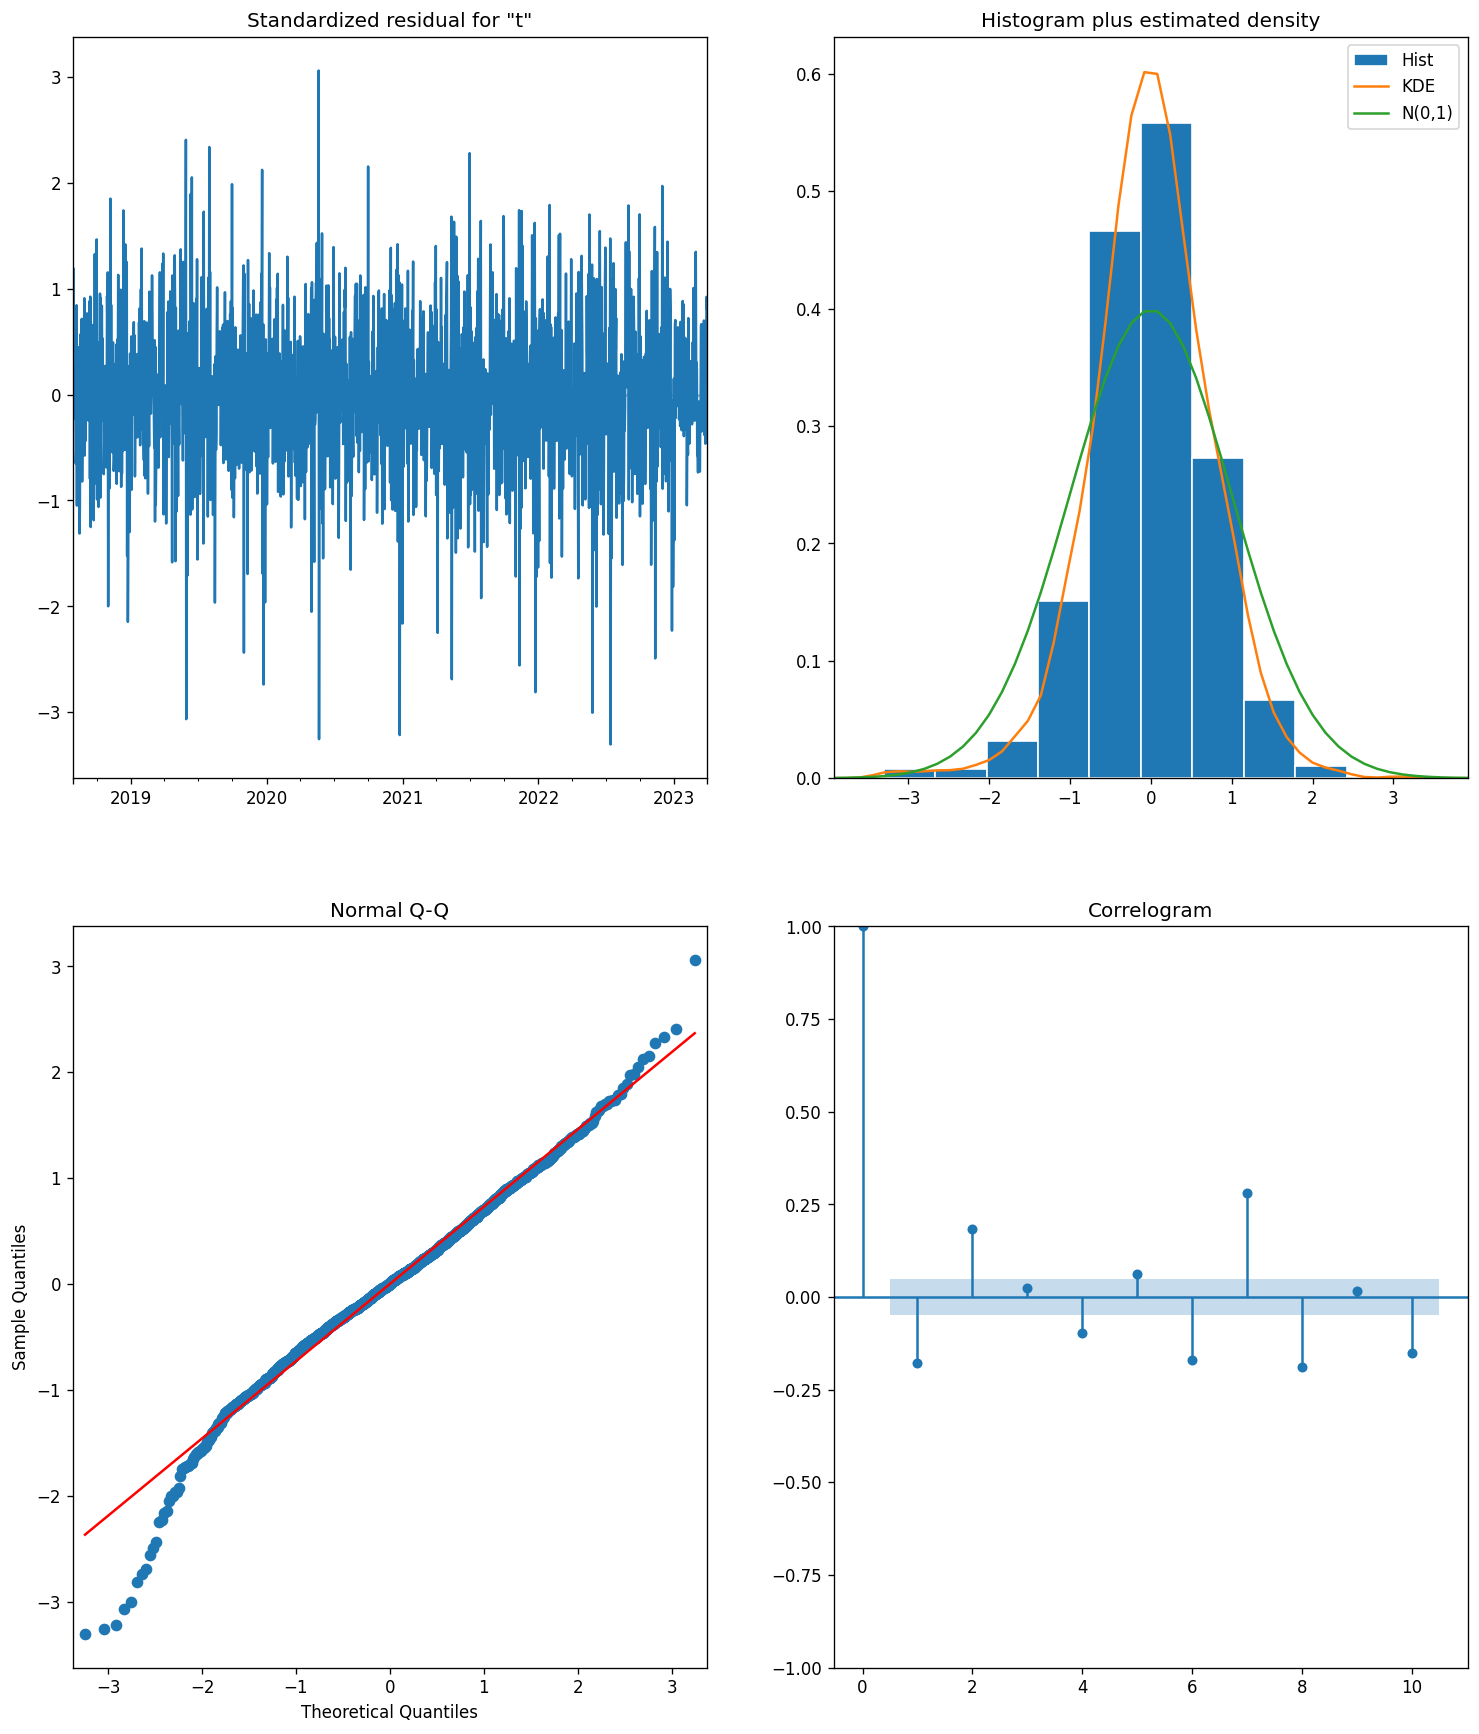

In [18]:
ARIMA_Model = sm.tsa.statespace.SARIMAX(train,
                                            order= (2, 1, 2),
                                            seasonal_order= (2, 0, 2, 12),
                                            enforce_invertibility=False,
                                            enforce_stationarity=False)
output = ARIMA_Model.fit()
print(output.summary().tables[1])
output.plot_diagnostics(figsize=(15,18))
plt.show()

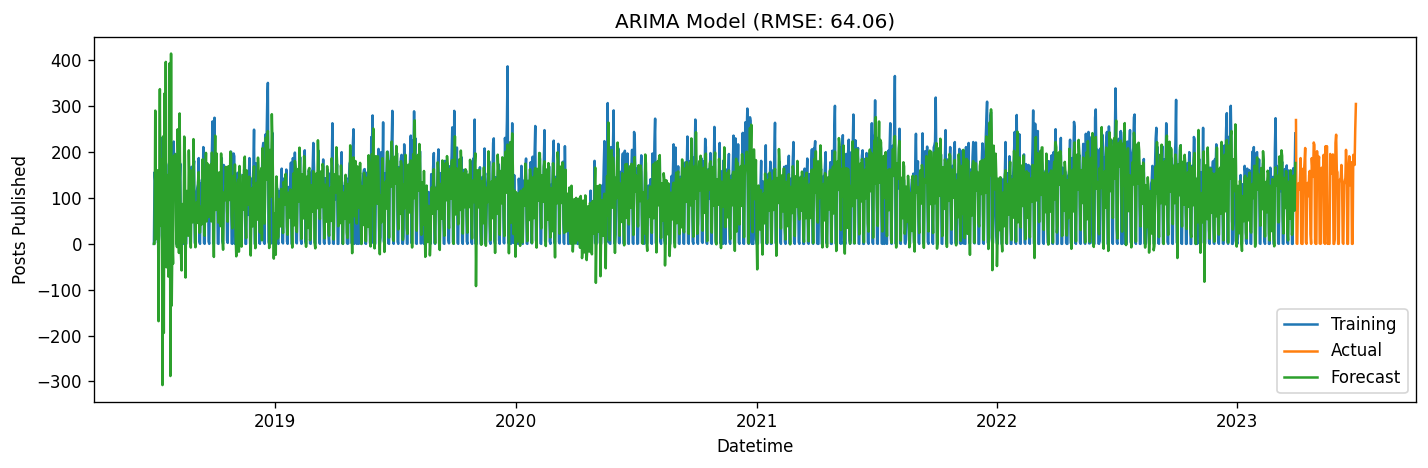

In [22]:
forecast = output.predict(0,(train.shape[0])-1).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=train.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(train, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

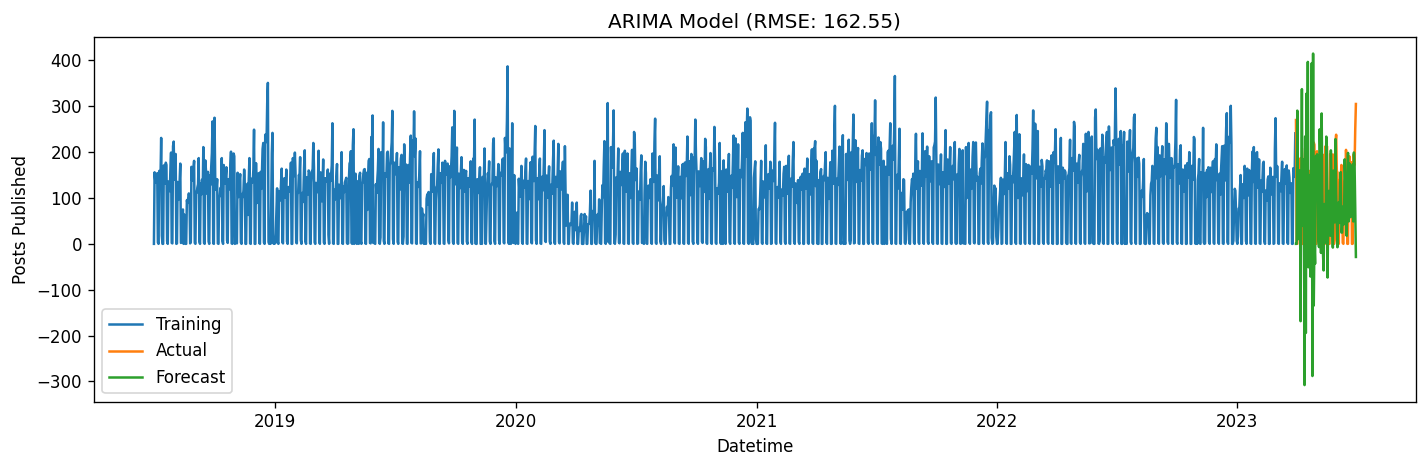

In [23]:
forecast = output.predict(0,(valid.shape[0])-1, dynamic= False).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(valid, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

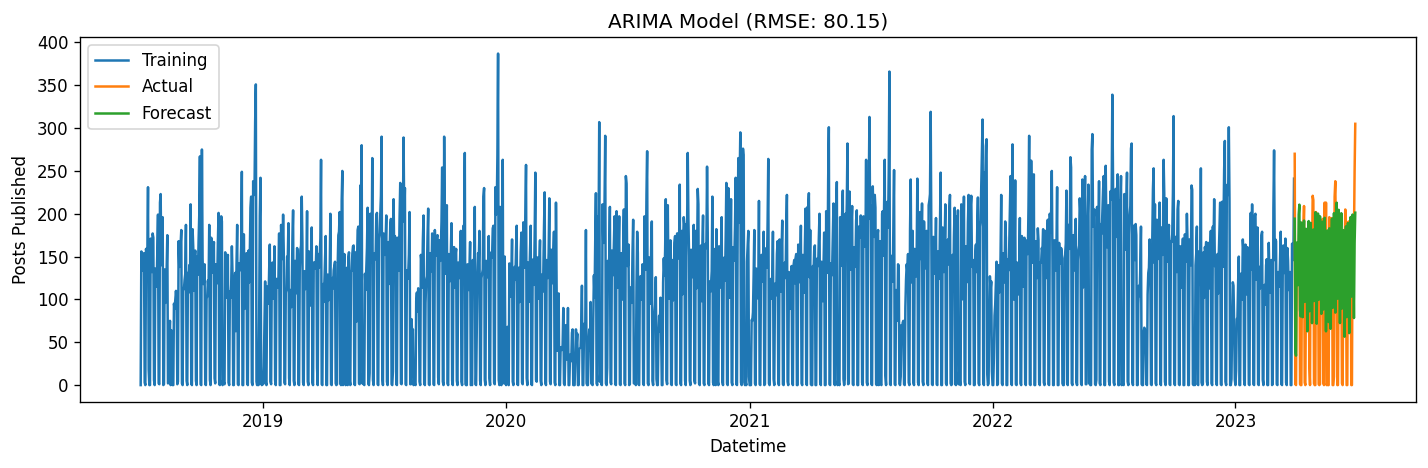

In [24]:
forecast = output.forecast(92).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(valid, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

In [25]:
forecast['valid']=valid['transactions_6']
forecast['forecast']=forecast['forecast'].astype(int)
forecast

,forecast,valid
date,,
2023-03-31,194,270
2023-04-01,38,1
2023-04-02,34,0
2023-04-03,166,117
2023-04-04,158,132
...,...,...
2023-06-26,199,194
2023-06-27,144,192
2023-06-28,78,172


In [ ]:
forecast['ecart']=forecast['forecast']-valid['transactions_6']

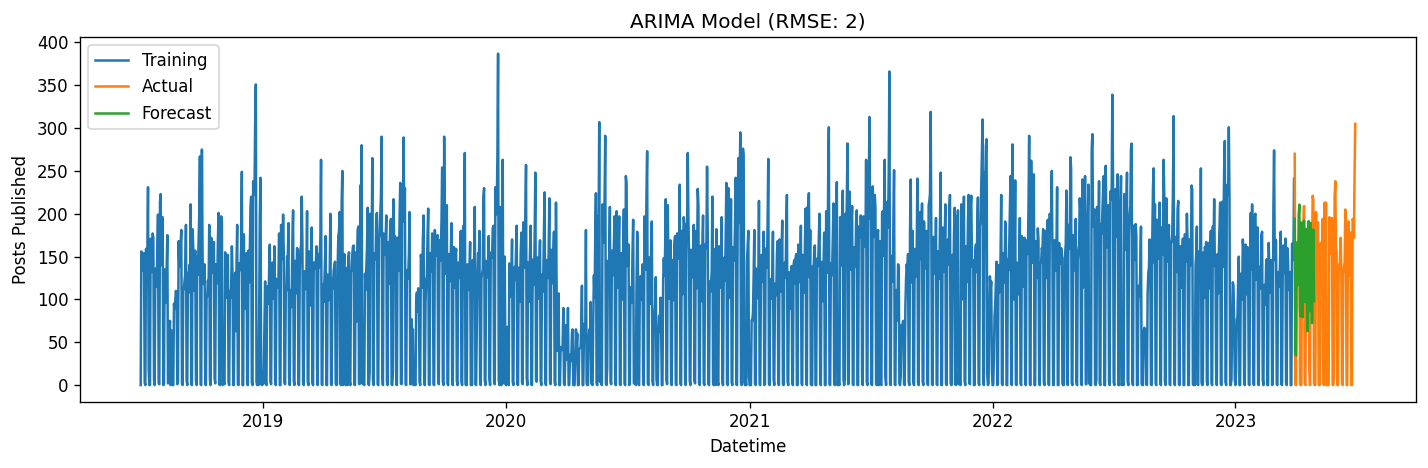

In [35]:
forecast = output.forecast(30).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.head(30).index

forecast = forecast.set_index('date')
#arima_rmse = mean_squared_error(forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', 2)

In [30]:
forecast = output.forecast(30).to_frame(name="forecast")
forecast


,forecast
2023-03-31,194.257579
2023-04-01,38.194821
2023-04-02,34.442937
2023-04-03,166.400403
2023-04-04,158.115874
2023-04-05,116.712303
2023-04-06,199.091557
2023-04-07,210.646329
2023-04-08,87.657470
2023-04-09,80.119060


In [31]:
valid

,transactions_6
Date,
2023-03-31,270
2023-04-01,1
2023-04-02,0
2023-04-03,117
2023-04-04,132
...,...
2023-06-26,194
2023-06-27,192
2023-06-28,172


           forecast
2023-06-30      NaN
2023-07-01      NaN
2023-07-02      NaN
2023-07-03      NaN
2023-07-04      NaN
2023-07-05      NaN
2023-07-06      NaN
2023-07-07      NaN
2023-07-08      NaN
2023-07-09      NaN
2023-07-10      NaN
2023-07-11      NaN
2023-07-12      NaN
2023-07-13      NaN
2023-07-14      NaN
2023-07-15      NaN
2023-07-16      NaN
2023-07-17      NaN
2023-07-18      NaN
2023-07-19      NaN
2023-07-20      NaN
2023-07-21      NaN
2023-07-22      NaN
2023-07-23      NaN
2023-07-24      NaN
2023-07-25      NaN
2023-07-26      NaN
2023-07-27      NaN
2023-07-28      NaN
2023-07-29      NaN
